### Problem Statement : Finding the most profitabel Esports Team to invest in by analysing their winnings across tournament

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
#importing data
countries = pd.read_csv('C:/Data analysis Project resources/Esports/country_and_continent_codes_list.csv')
players = pd.read_csv('C:/Data analysis Project resources/Esports/highest_earning_players.csv')
teams = pd.read_csv('C:/Data analysis Project resources/Esports/highest_earning_teams.csv')
pd.options.display.max_rows = 9999

## Data preprocessing

#### Countries

In [5]:
#making sure data imported properly
countries.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [6]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Continent_Name             262 non-null    object 
 1   Continent_Code             219 non-null    object 
 2   Country_Name               262 non-null    object 
 3   Two_Letter_Country_Code    261 non-null    object 
 4   Three_Letter_Country_Code  258 non-null    object 
 5   Country_Number             258 non-null    float64
dtypes: float64(1), object(5)
memory usage: 12.4+ KB


In [7]:
countries = countries.rename(columns ={'Continent_Name':'Continent','Two_Letter_Country_Code':'CountryCode','Country_Name':'Country'})
countries = countries[['Continent','Country','CountryCode']]
countries['Country'] = countries['Country'].str.split(',').str[0]
countries.head()

,Continent,Country,CountryCode
0,Asia,Afghanistan,AF
1,Europe,Albania,AL
2,Antarctica,Antarctica (the territory South of 60 deg S),AQ
3,Africa,Algeria,DZ
4,Oceania,American Samoa,AS


In [8]:
#countries = countries.dropna(axis = 0)

In [9]:
#count = countries.CountryCode.value_counts()
countries['CountryCode'].duplicated().sum()
countries = countries.drop_duplicates()
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Continent    262 non-null    object
 1   Country      262 non-null    object
 2   CountryCode  261 non-null    object
dtypes: object(3)
memory usage: 6.3+ KB


In [10]:
countries.duplicated().sum()

0

In [11]:
countries = countries.drop_duplicates() #removing duplicate values
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Continent    262 non-null    object
 1   Country      262 non-null    object
 2   CountryCode  261 non-null    object
dtypes: object(3)
memory usage: 6.3+ KB


#### Players

In [13]:
players.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [14]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerId       1000 non-null   int64  
 1   NameFirst      1000 non-null   object 
 2   NameLast       1000 non-null   object 
 3   CurrentHandle  1000 non-null   object 
 4   CountryCode    1000 non-null   object 
 5   TotalUSDPrize  1000 non-null   float64
 6   Game           1000 non-null   object 
 7   Genre          1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [15]:
players = players.rename(columns = {'NameFirst':'FirstName','NameLast':'LastName','CurrentHandle':'IngameId'})
players['CountryCode'] = players['CountryCode'].str.upper()
players = players.merge(countries, on ='CountryCode', how = 'left')

In [16]:
players['TotalUSDPrize'] = players['TotalUSDPrize'].astype('int64')

In [17]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PlayerId       1032 non-null   int64 
 1   FirstName      1032 non-null   object
 2   LastName       1032 non-null   object
 3   IngameId       1032 non-null   object
 4   CountryCode    1032 non-null   object
 5   TotalUSDPrize  1032 non-null   int64 
 6   Game           1032 non-null   object
 7   Genre          1032 non-null   object
 8   Continent      1032 non-null   object
 9   Country        1032 non-null   object
dtypes: int64(2), object(8)
memory usage: 80.8+ KB


In [18]:
players = players.sort_values('TotalUSDPrize',ascending = False).reset_index(drop=True)
players.head()

,PlayerId,FirstName,LastName,IngameId,CountryCode,TotalUSDPrize,Game,Genre,Continent,Country
0,3304,Johan,Sundstein,N0tail,DK,6952596,Dota 2,Multiplayer Online Battle Arena,Europe,Denmark
1,3822,Jesse,Vainikka,JerAx,FI,6470000,Dota 2,Multiplayer Online Battle Arena,Europe,Finland
2,30451,Anathan,Pham,ana,AU,6000411,Dota 2,Multiplayer Online Battle Arena,Oceania,Australia
3,2811,Sébastien,Debs,Ceb,FR,5554297,Dota 2,Multiplayer Online Battle Arena,Europe,France
4,18897,Topias,Taavitsainen,Topson,FI,5470902,Dota 2,Multiplayer Online Battle Arena,Europe,Finland


#### Teams

In [20]:
teams.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter


In [21]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TeamId            928 non-null    int64  
 1   TeamName          928 non-null    object 
 2   TotalUSDPrize     928 non-null    float64
 3   TotalTournaments  928 non-null    int64  
 4   Game              928 non-null    object 
 5   Genre             928 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 43.6+ KB


In [22]:
teams['TotalUSDPrize'] = teams['TotalUSDPrize'].astype('int64')
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TeamId            928 non-null    int64 
 1   TeamName          928 non-null    object
 2   TotalUSDPrize     928 non-null    int64 
 3   TotalTournaments  928 non-null    int64 
 4   Game              928 non-null    object
 5   Genre             928 non-null    object
dtypes: int64(3), object(3)
memory usage: 43.6+ KB


## Visualisation and insights

#### Top Earning players

In [25]:
players.Game.unique()

array(['Dota 2', 'Fortnite', 'Counter-Strike: Global Offensive',
       'League of Legends', 'Starcraft II', 'PUBG', 'Hearthstone',
       'Arena of Valor', 'Heroes of the Storm', 'Overwatch'], dtype=object)

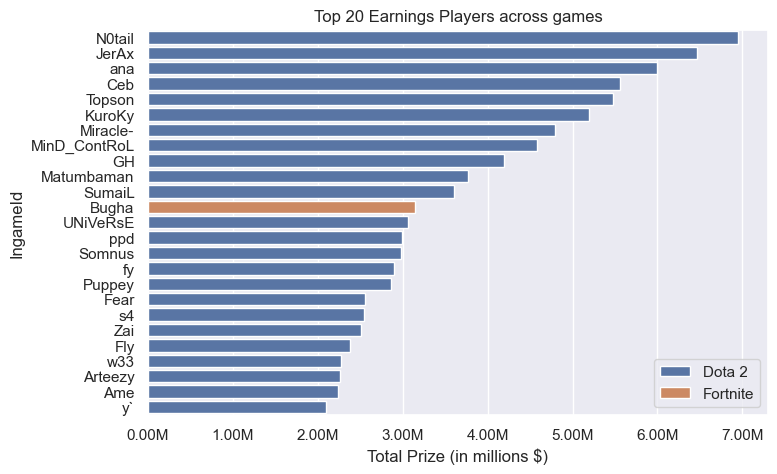

In [26]:
top_players = players
top_players['IngameId'] = top_players['IngameId'].replace('Somnus丶M', 'Somnus')
sns.set(style = 'darkgrid')
plt.figure(figsize=(8,5))
ax = sns.barplot(x= 'TotalUSDPrize', y = 'IngameId', data = top_players.head(25), hue = 'Game')
ax.legend_.set_title(None)
plt.xlabel('Total Prize (in millions $)')
plt.title('Top 20 Earnings Players across games')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))


In [27]:
top_fortnite_players= players[players['Game'] == 'Fortnite']
top_cs_players = players[players['Game'] == 'Counter-Strike: Global Offensive']

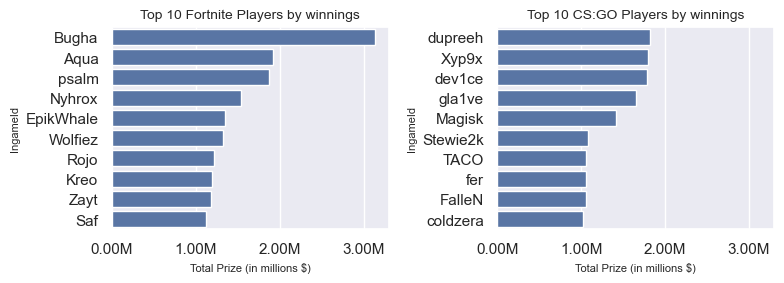

In [381]:
fig, axes = plt.subplots(1,2,sharex= True, figsize = (8,3))
sns.set(style = 'darkgrid')
sns.barplot(x= 'TotalUSDPrize', y = 'IngameId', data = top_fortnite_players.head(10), ax= axes[0])
sns.barplot(x= 'TotalUSDPrize',y= 'IngameId',data = top_cs_players.head(10), ax = axes[1])
axes[0].set_xlabel('Total Prize (in millions $)',fontsize = 8)
axes[0].set_ylabel('IngameId',fontsize = 8)
axes[1].set_xlabel('Total Prize (in millions $)',fontsize = 8)
axes[1].set_ylabel('IngameId',fontsize = 8)
axes[0].set_title('Top 10 Fortnite Players by winnings',fontsize = 10)
axes[1].set_title('Top 10 CS:GO Players by winnings',fontsize = 10)
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))
plt.tight_layout()

#### Countries with most profitable players

In [385]:
players.head()

,PlayerId,FirstName,LastName,IngameId,CountryCode,TotalUSDPrize,Game,Genre,Continent,Country
0,3304,Johan,Sundstein,N0tail,DK,6952596,Dota 2,Multiplayer Online Battle Arena,Europe,Denmark
1,3822,Jesse,Vainikka,JerAx,FI,6470000,Dota 2,Multiplayer Online Battle Arena,Europe,Finland
2,30451,Anathan,Pham,ana,AU,6000411,Dota 2,Multiplayer Online Battle Arena,Oceania,Australia
3,2811,Sébastien,Debs,Ceb,FR,5554297,Dota 2,Multiplayer Online Battle Arena,Europe,France
4,18897,Topias,Taavitsainen,Topson,FI,5470902,Dota 2,Multiplayer Online Battle Arena,Europe,Finland


In [387]:
earning_by_country = players.groupby('Country')['TotalUSDPrize'].sum()

In [395]:
earning_by_country = earning_by_country.sort_values(ascending = False)
earning_by_country = pd.DataFrame(earning_by_country)

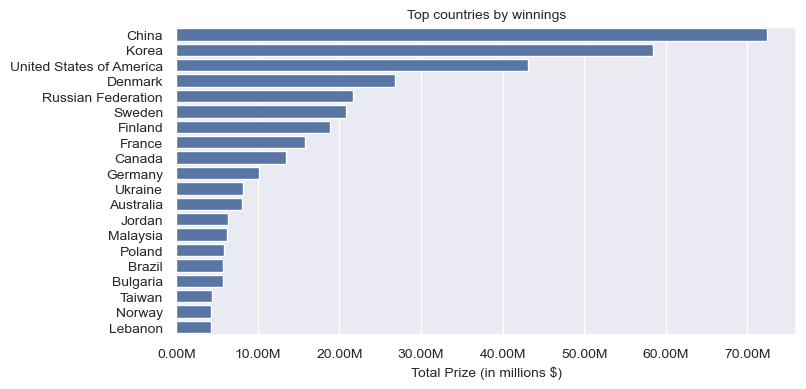

In [397]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x= 'TotalUSDPrize',y = 'Country', data = earning_by_country.head(20))
ax.set_xlabel('Total Prize (in millions $)', fontsize = 10)
plt.xticks(fontsize=10)
ax.set_ylabel(None)
plt.yticks(fontsize=10)
plt.title('Top countries by winnings', fontsize = 10)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))

This visualisation shows that China has won most prize money but it's hard to tell if it's because it has good players or large number of players since China population is very large it'll not be a strecth to assume this is the result of large no. of players in China's esports industry.

#### Teams with most earnings

In [310]:
total_earning_teams = teams.groupby('TeamName')['TotalUSDPrize'].sum()
total_earning_teams = pd.DataFrame(total_earning_teams).sort_values('TotalUSDPrize', ascending = False)
total_earning_teams.head()

,TotalUSDPrize
TeamName,
OG,34297886
Team Liquid,33095689
Evil Geniuses,21662170
Virtus.pro,14393877
Newbee,14072156


In [300]:
top_earning_teams = teams.copy()
top_earning_teams = top_earning_teams.sort_values('TotalUSDPrize', ascending = False)
top_earning_teams.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
500,419,OG,33810636,68,Dota 2,Multiplayer Online Battle Arena
501,102,Team Liquid,22967431,96,Dota 2,Multiplayer Online Battle Arena
502,101,Evil Geniuses,19988670,115,Dota 2,Multiplayer Online Battle Arena
503,210,Newbee,13523736,98,Dota 2,Multiplayer Online Battle Arena
504,211,Team Secret,11492345,79,Dota 2,Multiplayer Online Battle Arena


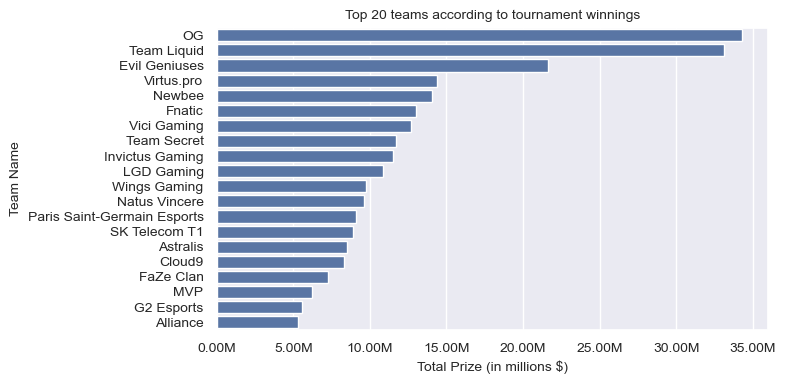

In [312]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x = 'TotalUSDPrize', y= 'TeamName', data = total_earning_teams.head(20))
ax.set_xlabel('Total Prize (in millions $)', fontsize = 10)
plt.xticks(fontsize=10)
ax.set_ylabel('Team Name', fontsize = 10)
plt.yticks(fontsize=10)
plt.title('Top 20 teams according to tournament winnings', fontsize = 10)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))

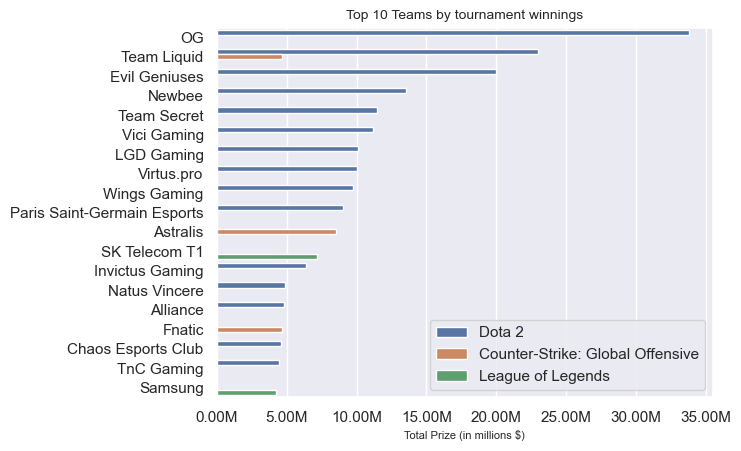

In [314]:
ax= sns.barplot(x= 'TotalUSDPrize',y= 'TeamName',data = top_earning_teams.head(20), hue = 'Game')
ax.set_xlabel('Total Prize (in millions $)',fontsize = 8)
ax.set_ylabel(None)
ax.legend_.set_title(None)
ax.set_title('Top 10 Teams by tournament winnings',fontsize = 10)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))

OG earning by tournament winnings in Dota 2 is greater than Team Liquid combined earning across multiple games which proves that OG esports is the most successful team.

In [121]:
dota2_teams = top_earning_teams[top_earning_teams['Game']=='Dota 2']
cs_teams = top_earning_teams[top_earning_teams['Game']=='Counter-Strike: Global Offensive']
lol_teams = top_earning_teams[top_earning_teams['Game']=='League of Legends']

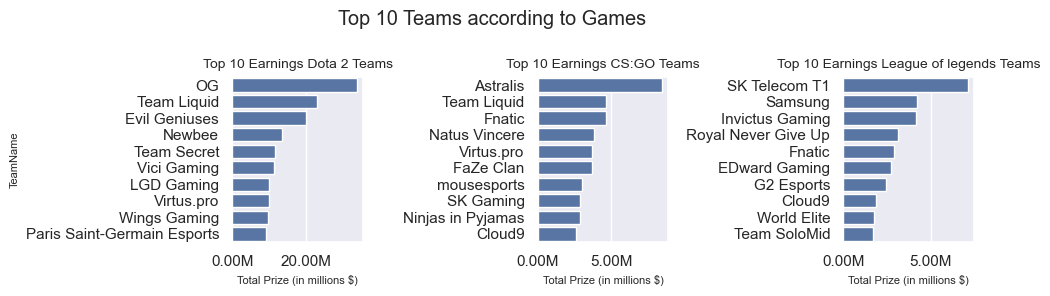

In [99]:
fig, axes = plt.subplots(1,3, figsize = (10,3))
fig.suptitle('Top 10 Teams according to Games')
sns.set(style = 'darkgrid')
sns.barplot(x= 'TotalUSDPrize', y = 'TeamName', data =dota2_teams.head(10), ax= axes[0])
axes[0].set_xlabel('Total Prize (in millions $)',fontsize = 8)
axes[0].set_ylabel('TeamName',fontsize = 8)
axes[0].set_title('Top 10 Earnings Dota 2 Teams',fontsize = 10)
axes[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))

sns.barplot(x= 'TotalUSDPrize',y= 'TeamName',data = cs_teams.head(10), ax = axes[1])
axes[1].set_xlabel('Total Prize (in millions $)',fontsize = 8)
axes[1].set_ylabel(None)
axes[1].set_title('Top 10 Earnings CS:GO Teams',fontsize = 10)
axes[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))

sns.barplot(x= 'TotalUSDPrize',y= 'TeamName',data = lol_teams.head(10), ax = axes[2])
axes[2].set_xlabel('Total Prize (in millions $)',fontsize = 8)
axes[2].set_ylabel(None)
axes[2].set_title('Top 10 Earnings League of legends Teams',fontsize = 10)
axes[2].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))

plt.tight_layout()

#### Winings by Games

In [352]:
prize_by_games = teams.groupby('Game')['TotalUSDPrize'].sum()
prize_by_games = prize_by_games.sort_values(ascending = False)
prize_by_games = pd.DataFrame(prize_by_games)
prize_by_games.head()

,TotalUSDPrize
Game,
Dota 2,220282731
Counter-Strike: Global Offensive,84853899
League of Legends,64665517
Fortnite,34661313
Starcraft II,27856100


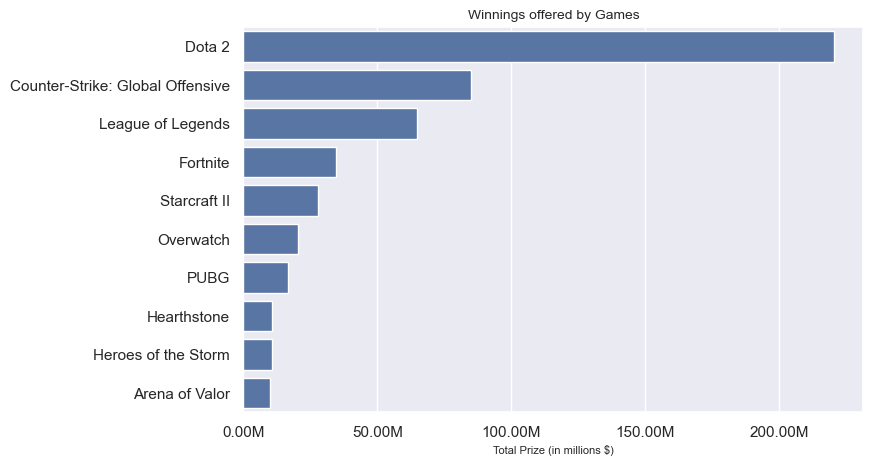

In [354]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x = 'TotalUSDPrize',y  ='Game', data = prize_by_games)
ax.set_xlabel('Total Prize (in millions $)',fontsize = 8)
ax.set_ylabel(None)
ax.set_title('Winnings offered by Games',fontsize = 10)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))

Dota 2 gave away most money as winnings to teams.

#### Tournament Counts

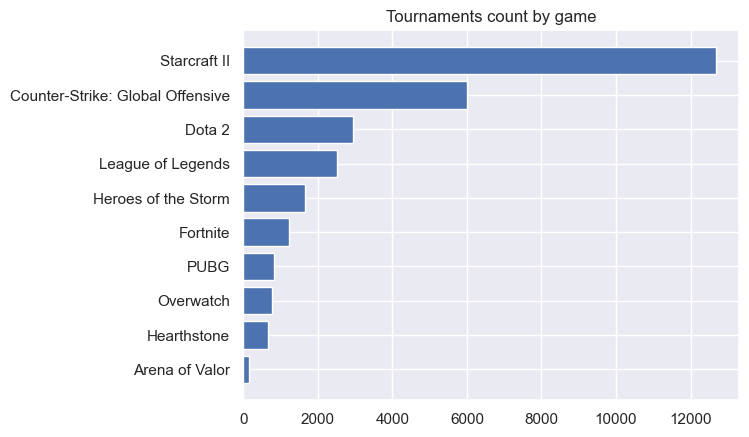

In [347]:
tournaments_count = teams.groupby('Game')['TotalTournaments'].sum().sort_values(ascending=True)
plt.barh(tournaments_count.index, tournaments_count.values)
plt.title('Tournaments count by game');

Starcraft II had most number of tournaments.

#### Avg prize per tournament by game

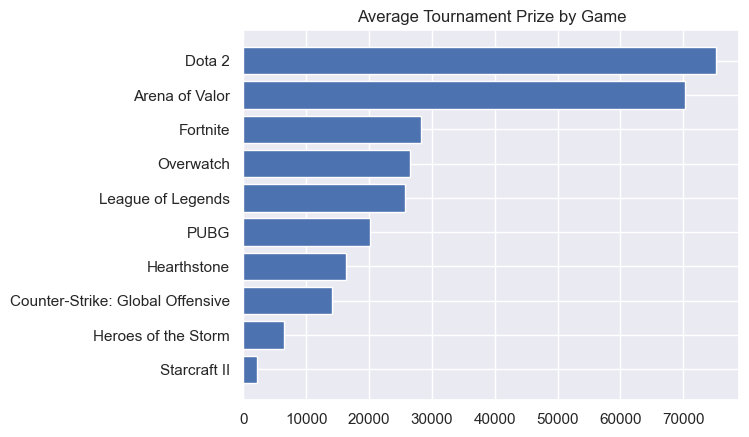

In [370]:
avg_prize_by_games = teams.groupby(['Game'])['TotalUSDPrize'].sum().sort_index()
tournaments_count = teams.groupby('Game')['TotalTournaments'].sum().sort_index()
avg = (avg_prize_by_games / tournaments_count).astype('int64')
avg = avg.sort_values(ascending=True)
plt.barh(avg.index, avg.values)
plt.title('Average Tournament Prize by Game')
plt.show()

Since Dota 2 has the largest winning pool across games, i'll focus on that and check which team is most efficient that is which team won the most money while playing least games or tournament.

In [127]:
dota2_teams.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,419,OG,33810636,68,Dota 2,Multiplayer Online Battle Arena
1,102,Team Liquid,22967431,96,Dota 2,Multiplayer Online Battle Arena
2,101,Evil Geniuses,19988670,115,Dota 2,Multiplayer Online Battle Arena
3,210,Newbee,13523736,98,Dota 2,Multiplayer Online Battle Arena
4,211,Team Secret,11492345,79,Dota 2,Multiplayer Online Battle Arena


In [379]:
top_dota2_teams = dota2_teams.copy()
top_dota2_teams= top_dota2_teams.rename(columns = {'TotalUSDPrize':'TotalUSDPrize(in millions)'})
top_dota2_teams['TotalUSDPrize(in millions)'] = round(top_dota2_teams['TotalUSDPrize(in millions)']/1000000,2)
top_dota2_teams['Efficiency'] = round((top_dota2_teams['TotalUSDPrize(in millions)']/top_dota2_teams['TotalTournaments'])* 100,2)
most_efficient_dota2_teams = top_dota2_teams.sort_values('Efficiency', ascending = False).reset_index(drop = True)
most_efficient_dota2_teams.head()

,TeamId,TeamName,TotalUSDPrize(in millions),TotalTournaments,Game,Genre,Efficiency
0,419,OG,33.81,68,Dota 2,Multiplayer Online Battle Arena,49.72
1,507,Wings Gaming,9.74,24,Dota 2,Multiplayer Online Battle Arena,40.58
2,581,Russian National Team,0.80,2,Dota 2,Multiplayer Online Battle Arena,40.00
3,623,Paris Saint-Germain Esports,9.07,27,Dota 2,Multiplayer Online Battle Arena,33.59
4,102,Team Liquid,22.97,96,Dota 2,Multiplayer Online Battle Arena,23.93


Now we know that OG is the most efficient team in Dota 2 so if someone wants to invest in Dota 2 esports team then OG is the most profitable choice.

### Conclusion

Dota 2 has the biggest winning pool across games and it is evident that OG esports has been taking the most benefit of this as it is the most successful and efficient Dota 2 team so from the investment point of view OG esports is the most optimal team when it comes to Dota 2.

